In [202]:
# import libraries

import os
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle

import warnings
warnings.filterwarnings('ignore')

# Load data set

In [138]:
# creating function that create folder and store the file in folder

def load_data(path,urls):
  dir=os.makedirs(path,exist_ok=True)

  for url in urls:
    data=requests.get(url).content
    file_name=os.path.join(path,os.path.basename(url))
    with open(file_name,'wb') as f:
      f.write(data)


# storing the urls in list
urls = ["https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
        "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names",
        "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"]

# path where we create folder
path='/content/drive/MyDrive/Census_data'


# calling the function 
load_data(path,urls)


- We have created a function that downloads the  content from url and store it in file that is placed in folder

In [139]:
# extracting the features names from names file

names=pd.read_csv('/content/drive/MyDrive/Census_data/adult.names',sep='delimeter', header=None)
feature_columns=names[93:]
feature_columns=feature_columns[0].str.split(':').str[0]
columns_name=list(feature_columns)+['income']
columns_name

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [140]:
# reading the trainig and testing file

train_data=pd.read_csv('/content/drive/MyDrive/Census_data/adult.data',names=columns_name,na_values='?',skipinitialspace=True)

test_data=pd.read_csv('/content/drive/MyDrive/Census_data/adult.test',names=columns_name, skiprows=1,na_values='?',skipinitialspace=True)

- We have some whitespaces and misleading data point (?).
- We skip the whitespaces and fill nan inplace of ?.
- In test data set the first row is weired so we skip it.

In [141]:
train_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Exploratory Data Analysis

In [142]:
# shape of data set
print('shape of trainig data set: ',train_data.shape)
print('shape of testing data set: ',test_data.shape)

shape of trainig data set:  (32561, 15)
shape of testing data set:  (16281, 15)


#### Renaming the columns names

In [143]:
# renaming the columns names of training and testing data set

train_data.columns=train_data.columns.str.replace('-','_')
train_data.columns=train_data.columns.str.replace(' ','_')

test_data.columns=test_data.columns.str.replace('-','_')
test_data.columns=test_data.columns.str.replace(' ','_')

In [144]:
# printing the info

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [145]:
# checking the null values 

train_data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

### Summary of data set
- We have training and testing data set
- Training data set contain 32561 rows and 15 columns
-While testing data set contain 16282 rows and 15 columns
- Some columns are numerical and some are categorical 
- Workclass, occupation, and native_country columns contains null values

#### education_num
- Education_num column contains the numerical value that is corresponding to the education level
- As an example 13 represent education level as Bachelor

## income column
- We are replacing the <=50K class with 0 and >50K as1
- It means the persons who earn less than or equal to 50K belongs to class 0 and who earns more than 50K belongs to class 1

In [146]:
# Replcaing 

train_data['income']=train_data['income'].map({'<=50K':0,'>50K':1})
test_data['income']=test_data['income'].map({'<=50K':0,'>50K':1})

## Statistical analysis of numerical columns

In [147]:

train_data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


#### Age column
- The mean value of age attriubute is about 38 that indicate average age is 38 year
- Age is having a standard deviation of 13.6 that indicate the deviation from mean is 13.6
- The value of age attribute lie between 17 to 90
- First quartile(Q1) of age attribute is 28 that indicates 25% of values lies below 28
- Third quartile(Q3) of age atribute is 48 that indicates 75 % of values lie below 48
- Difference between Q1 and minimum (28-17=11) is lesser than difference between Q3 and maximumn (90-48=42) that indicate there is some skewness or data in this column is rightly skewed


## fnlwgt
- This column represent the sampling weights
-It seems rightly skewed because difference between minimum and median is lesser than difference between median and maximum.

## capital_gain
- The mean value for capital_gain is 1077.6 and the medain value is 0
- Mean is very high than median, it shows data is highly right skewed
- We can see 75% of  people have not any capitalgain or have capital gain equal to 0, that  means most of the value are centered to 0
-The people who have capital gain more than zero lies between Q3 to maximum
- It means either people have 0 gain or have higher gain


## Capital_loss
- The mean value for capital_loss is 87 and meadian is 0. It means data is highly right skewed
- Here also 75 % of people have capital loss equals to 0.
- People who have capital loss more tha 0 lies between Q3 to maximum
- It means either people have 0 capital loss or have high capital loss

### Hours_per_week
- The mean value for hgours_per_week is 40.4 and standard deviation is 12.3
- The minimum hours spent per week is 1 hour or maximum hours spent per week are 99 hours
- The median and mean value are approximately same sothere may be chances that data is symetric

## Statistical analysis of categorcal column

In [148]:
cat_col=[col for col in train_data.columns if train_data[col].dtype=='O' ]
train_data[cat_col].describe()

# another way
# train_data.describe(include='O')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
count,30725,32561,32561,30718,32561,32561,32561,31978
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27816,21790,29170


## Workclass
- There are 8 unique categories in workclass column
- The top category in workclass is Private  with frequency of 22696

## education
- There are 16 unique  categories in education column
- The top category is HS-grad with frequency of 1051

## marital_status
- marital_status column has 7 unique categories
- Top category is married_civilian_spouse  with frequency of 14976

## race
- There are 5 caterogies in race column
- Top category in race column is White  with frequency of 27816

## sex
- There are two category in sex column
- Number of Males are  more than number of Female

## native_country
- Number of the peoples whoes native country is United-States are 29170 that is maximum among other cateogry


# Visualization

### Distribution 
- Checking the distribution of numerical columns
- Draw distplot to check distribution

In [149]:
num_col=[col for col in train_data.columns if train_data[col].dtype!='O']
num_col

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'income']

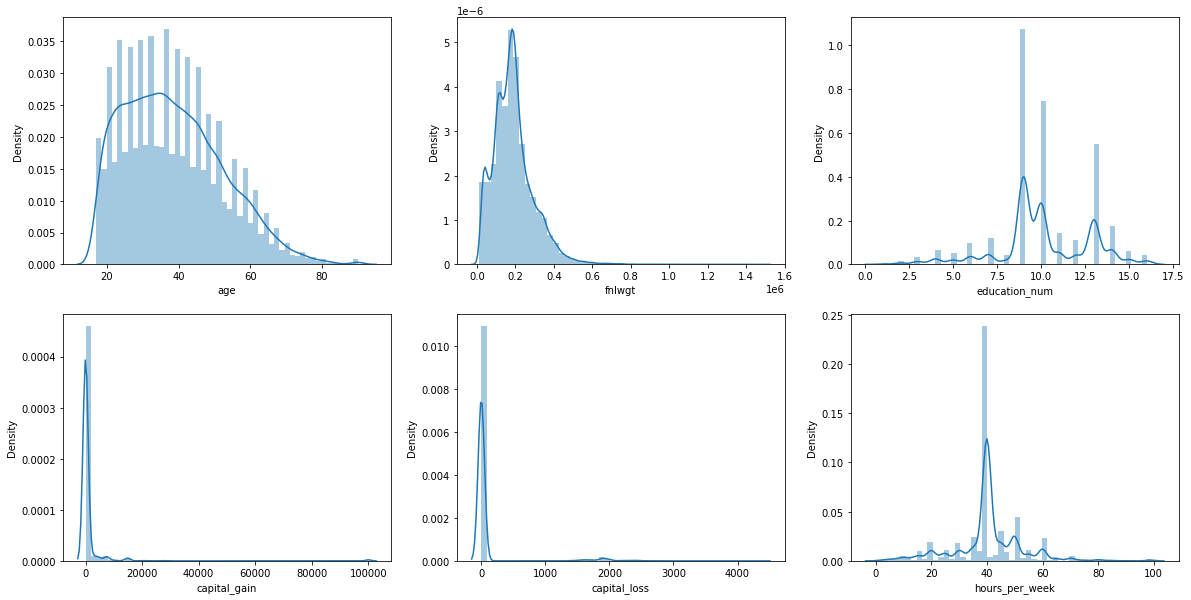

In [150]:
fig,axes=plt.subplots(2,3,figsize=(20,10))
axes=axes.flatten()

sns.distplot(ax=axes[0],a=train_data['age'])

sns.distplot(ax=axes[1],a=train_data['fnlwgt'])

sns.distplot(ax=axes[2],a=train_data['education_num'])

sns.distplot(ax=axes[3],a=train_data['capital_gain'])

sns.distplot(ax=axes[4],a=train_data['capital_loss'])

sns.distplot(ax=axes[5],a=train_data['hours_per_week'])


Text(0.5, 1.0, 'hours_per_week distribution')

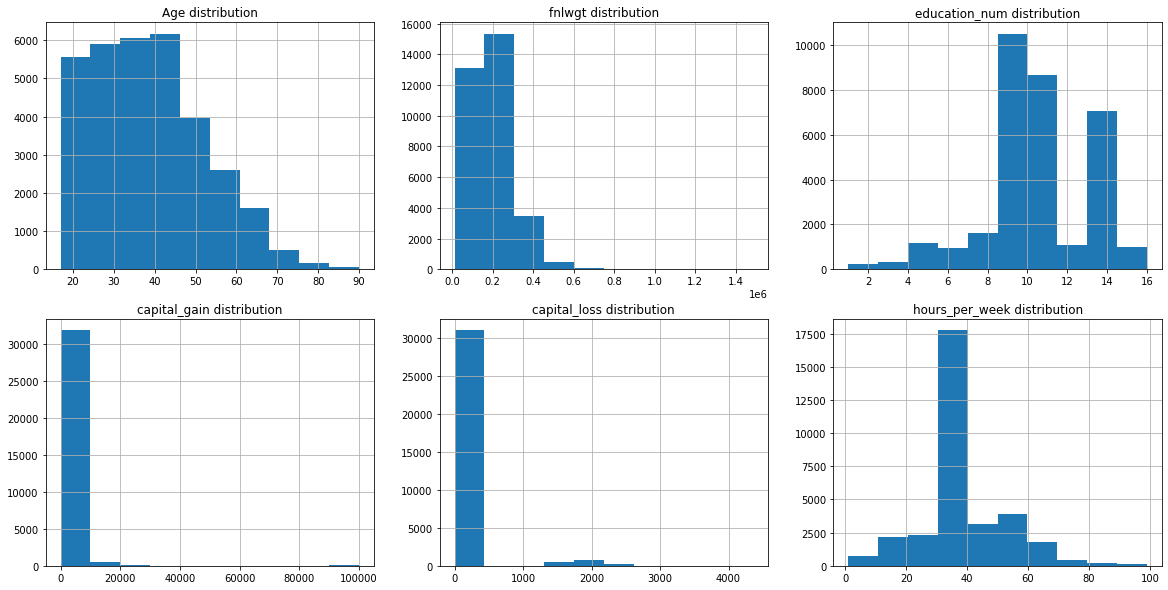

In [151]:
# we also plot histogram to see the distribution

fig,axes=plt.subplots(2,3,figsize=(20,10))
axes=axes.flatten()
train_data['age'].hist(ax=axes[0])
axes[0].set_title('Age distribution')

train_data['fnlwgt'].hist(ax=axes[1])
axes[1].set_title('fnlwgt distribution')

train_data['education_num'].hist(ax=axes[2])
axes[2].set_title('education_num distribution')

train_data['capital_gain'].hist(ax=axes[3])
axes[3].set_title('capital_gain distribution')

train_data['capital_loss'].hist(ax=axes[4])
axes[4].set_title('capital_loss distribution')

train_data['hours_per_week'].hist(ax=axes[5])
axes[5].set_title('hours_per_week distribution')


## Analysis of distrubution
### Age
- The distribution of age column is not symmetric
- It seems right skewed ( It is tottaly fine because younger person earn) more than olders

### fnlwgt
- fnwlgt represent sample weights
- The distribution of fnwlgt looks rightly skewed

### capital_gain
- Most of values are centered on 0
- It shows either people have 0 gain or higher gain



### capital_loss
- Same as capitla_gain most of the values of capitla loss are centered on 0
- It also shows either people has 0 loss or have higher loss

### hours_per_week
- Most of the people are working between 30 to 40 hours per week
- There are some people who are working between 80 t0 99 hours per week which is unusual


# Countplot for categorical columns
- We plot countplots to analyse categorical columns

In [152]:
# name of the categorical columns

cat_col

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

### Workclass

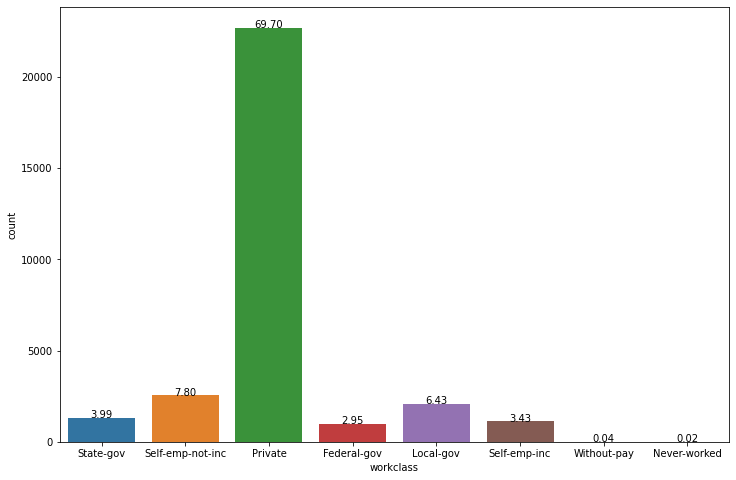

In [153]:
plt.figure(figsize=(12,8))
total = float(len(train_data["income"]) )

ax = sns.countplot(x="workclass", data=train_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 5,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### Description for workclass 
- There are 8 unique categories in workclass
- About 69.70 % of people belongs to Private workclass
- Count for without-pay and Never-worked is minimum


### Education

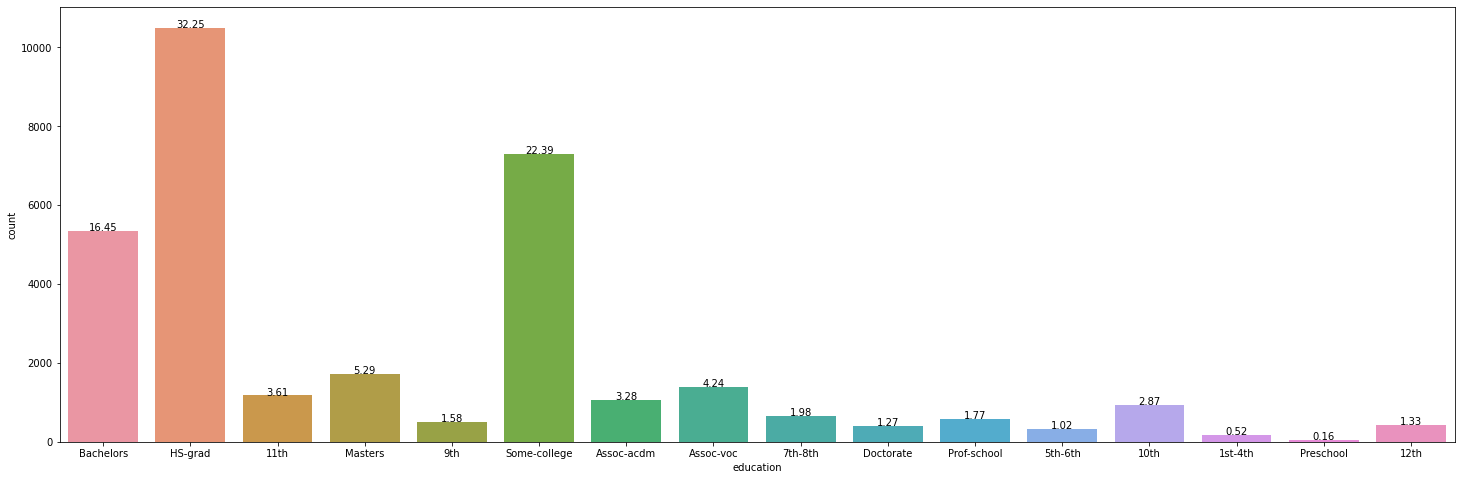

In [154]:
plt.figure(figsize=(25,8))

total=len(train_data['income'])

ax=sns.countplot(x='education',data=train_data)

for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,height+5,
          '{:1.2f}'.format(100*height/total),
          ha='center')

### Description for education attribute
- There are 16 categories in education attribute
- 32.25% of the people done Hs-grad in education that is maximum
- Preschool category has minimum observation

### Marital Status

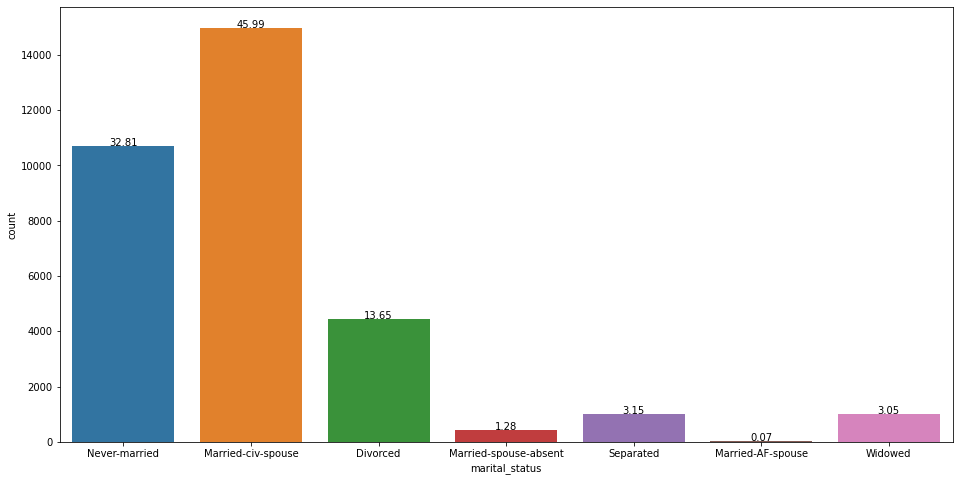

In [155]:
plt.figure(figsize=(16,8))

total=len(train_data['income'])

ax=sns.countplot(x='marital_status',data=train_data)

for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,height+5,
          '{:1.2f}'.format(100*height/total),
          ha='center')

### Description for marital status
- There are 7 categories in marital staus attribute
- Married-civilian-spouse has maximum number of observation followed by Never-married category
- Married-Armed-Force-spouce has minimum observation

### Occupation

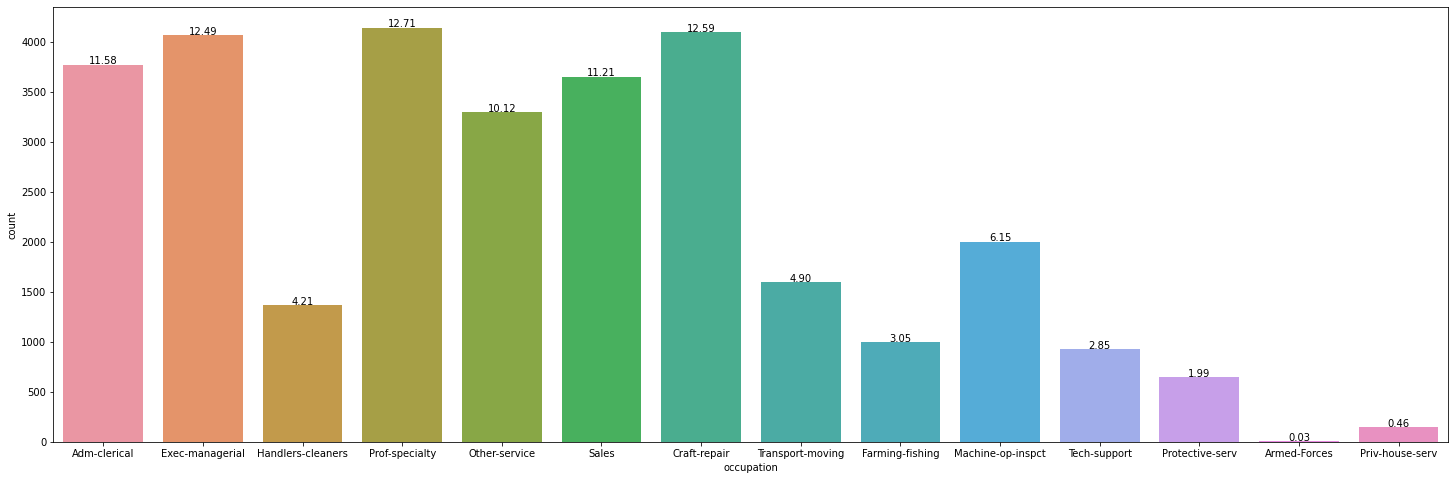

In [156]:
plt.figure(figsize=(25,8))

total=len(train_data['income'])

ax=sns.countplot(x='occupation',data=train_data)

for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,height+5,
          '{:1.2f}'.format(100*height/total),
          ha='center')

### Description for occupation attribute

- There are 14 unique categories in occupation attribute
- Prof-speciality has maximum number of observation. It contains 12.71 % of the observations
- Armed-Forces has minimum number of observations

### Relationship


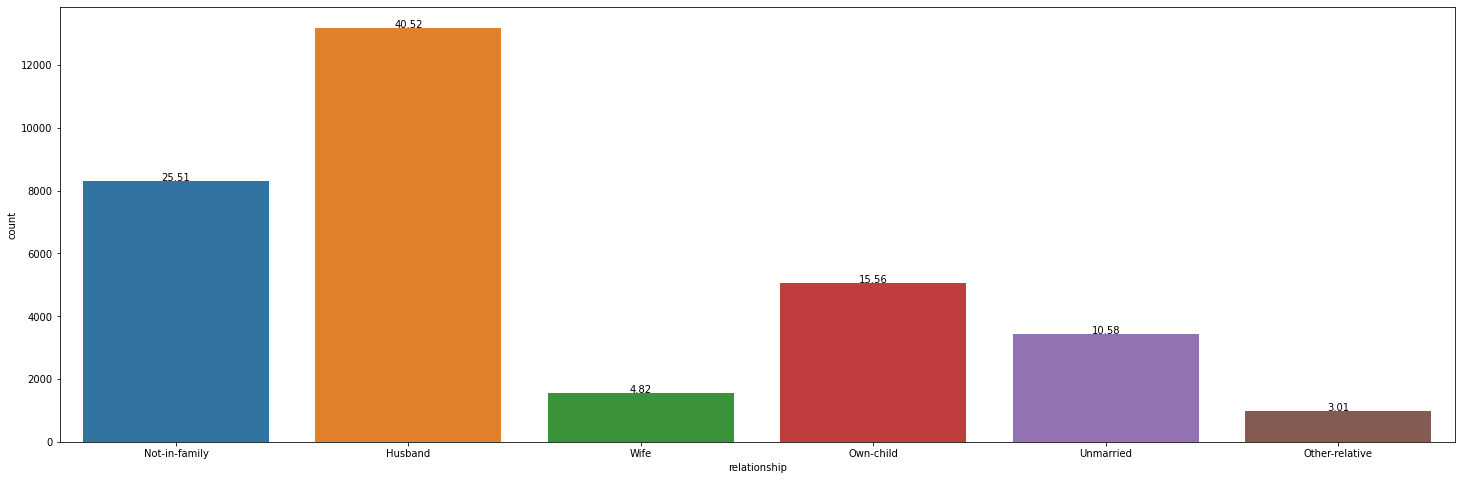

In [157]:
plt.figure(figsize=(25,8))

total=len(train_data['income'])

ax=sns.countplot(x='relationship',data=train_data)

for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,height+5,
          '{:1.2f}'.format(100*height/total),
          ha='center')

### Description for relationship attribute
- There are 6 unique categories in relationship attribute
- Husband category has maximum number of observations. It contains 40.52 % of the observations
- Other-relative category contains minimum number of obseervations

### Race

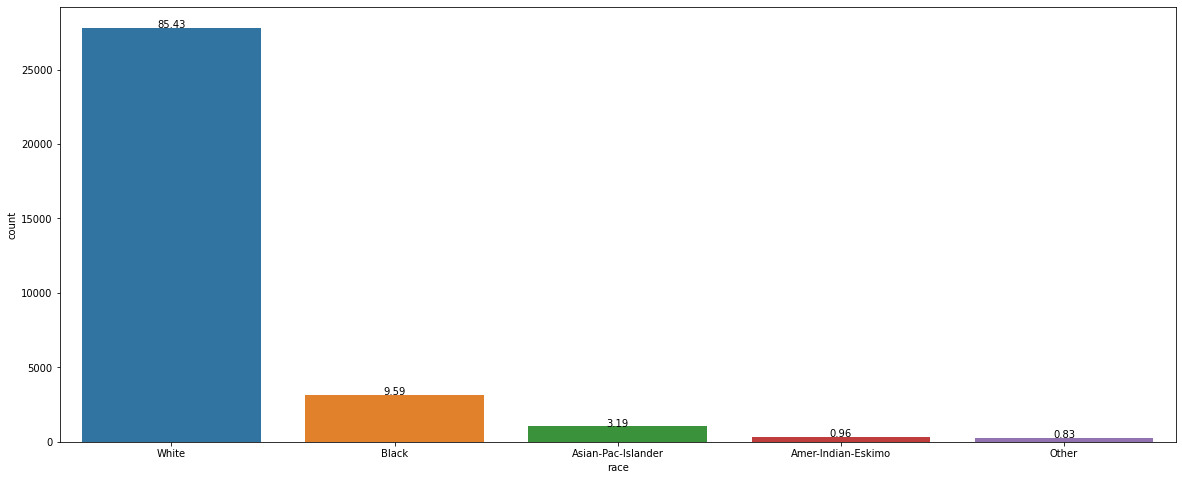

In [158]:
plt.figure(figsize=(20,8))

total=len(train_data['income'])

ax=sns.countplot(x='race',data=train_data)

for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,height+5,
          '{:1.2f}'.format(100*height/total),
          ha='center')

### Description for race attribute
- There are 5 unique categories in race attribute
- Maximum number of people (approximate 85 %) belongs to White class
- Other class contains minimum number of observations

### Sex


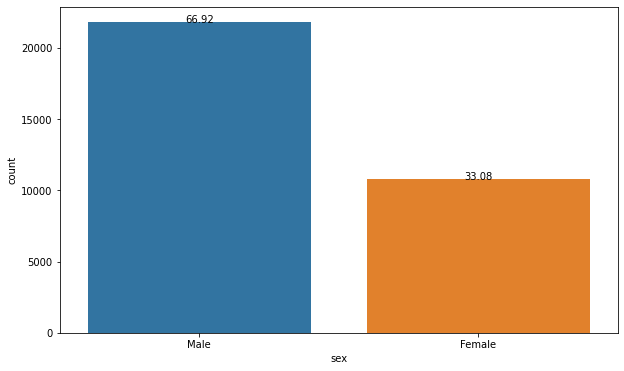

In [159]:
plt.figure(figsize=(10,6))

total=len(train_data['income'])

ax=sns.countplot(x='sex',data=train_data)

for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,height+5,
          '{:1.2f}'.format(100*height/total),
          ha='center')

### Description for sex attribute
- There are 2 categories in sex attribute
- Male class has maximum number of observations. It contains approximate 67 % of the observations 

### Native country

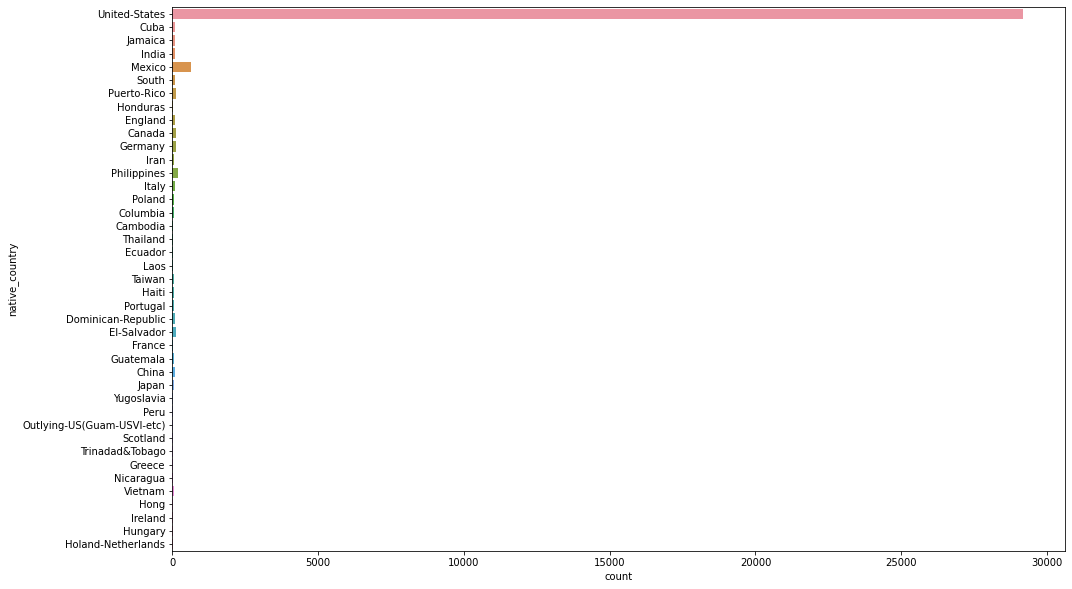

In [160]:
plt.figure(figsize=(16,10))

ax=sns.countplot(y='native_country',data=train_data)

### Description for native country atribute
- Most of the peoples have their country as United States followed by Mexico

### Income 

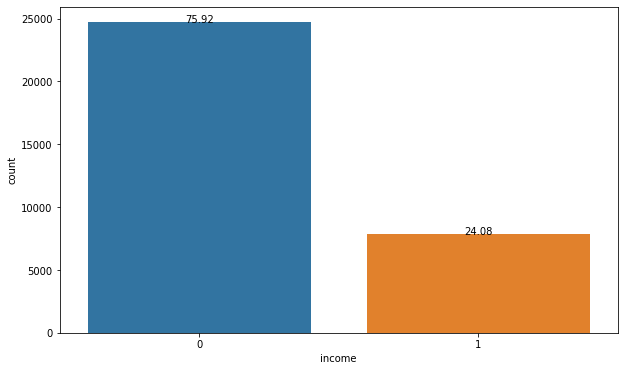

In [161]:
plt.figure(figsize=(10,6))

total=len(train_data['income'])

ax=sns.countplot(x='income',data=train_data)

for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,height+5,
          '{:1.2f}'.format(100*height/total),
          ha='center')

### Description about income
- Approximate 76 % of the peoples belongs to the category who earn less than 50K
- Only 24 % of the peoples are able to earn more than 50K and belongs to class 1
- We can see the data is imbalanced 

### Bivariate analysis

## income and age

In [162]:
train_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


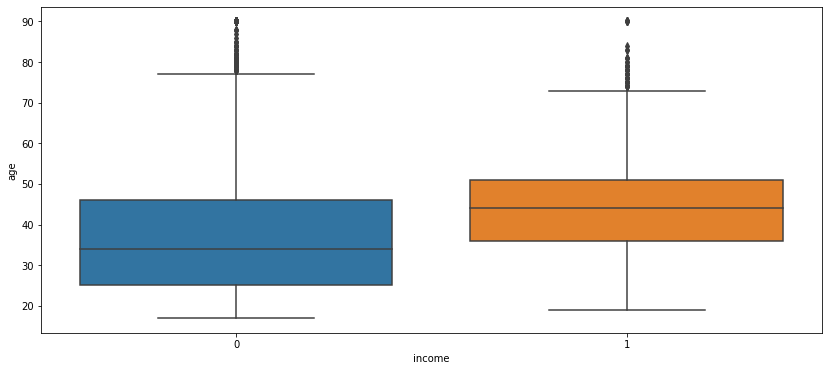

In [163]:
# draw boxplot

plt.figure(figsize=(14,6))
sns.boxplot(x='income',y='age',data=train_data )

### Analysis 
- Medain age for the people who are earning less than 50K is lower than those people wo are earning more than 50K
- There are outliers in our for both group 
- Flexibility of age for group who are earning more than 50K is less than the group of people who are earning less than or equal 50K

## Income and Capital Gain


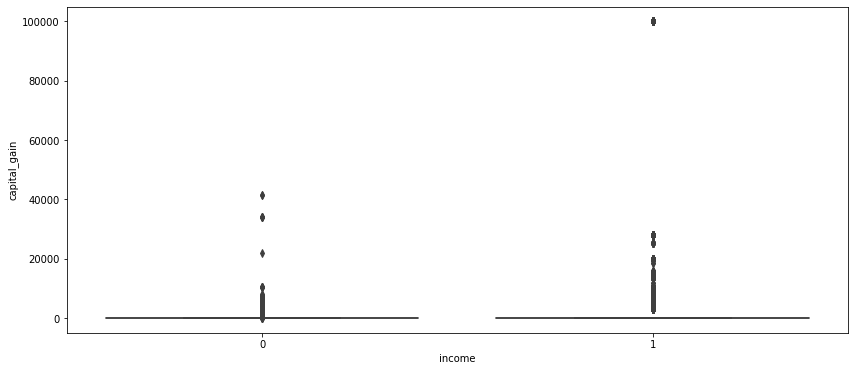

In [164]:
plt.figure(figsize=(14,6))
sns.boxplot(x='income',y='capital_gain',data=train_data)

### Analysis
- Most of the observations are centered at 0.
- There are some outliers in data set for both of the group

###Income, Capital-loss


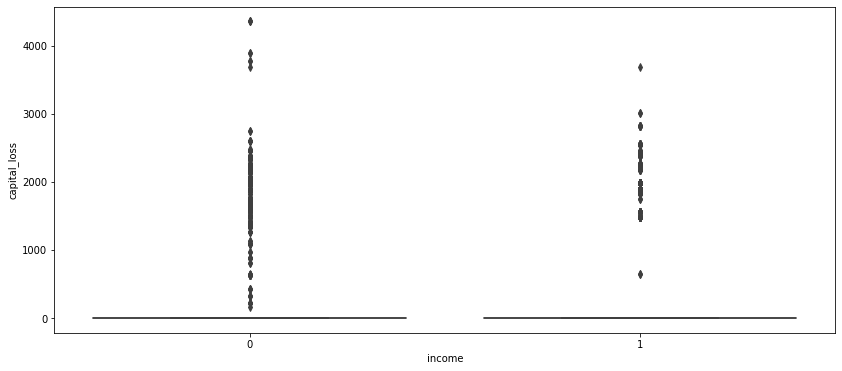

In [165]:
plt.figure(figsize=(14,6))
sns.boxplot(x='income',y='capital_loss',data=train_data)

### Analysis
- Here also most of the observations are cenetred at 0
- Here outliers for group 0 (=50K) are more than the group 1 

### Income, Hours-per- week

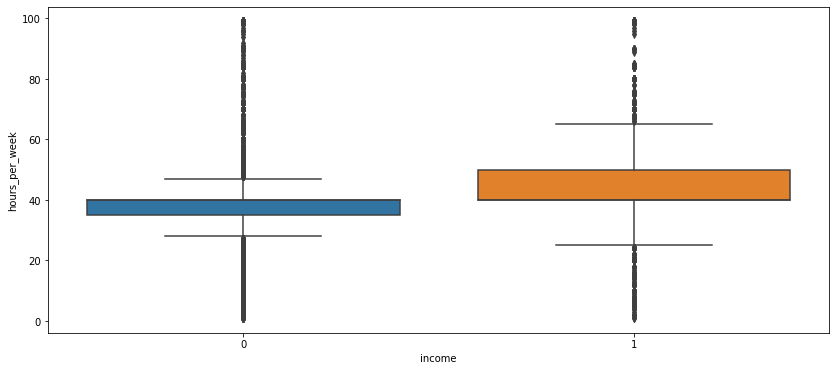

In [166]:
plt.figure(figsize=(14,6))
sns.boxplot(x='income',y='hours_per_week',data=train_data)

### Analysis
- Median number of hours per week for group who earns less than and equal 50K are less than the group who earns more than 50K 
- Outliers are present in both of the groups but for the group 0 there are more outliers
- There is more flexibilty of hours for group who earn more than 50K in comparison of group who ean less than or equal to 50K

### Income, fnlwgt

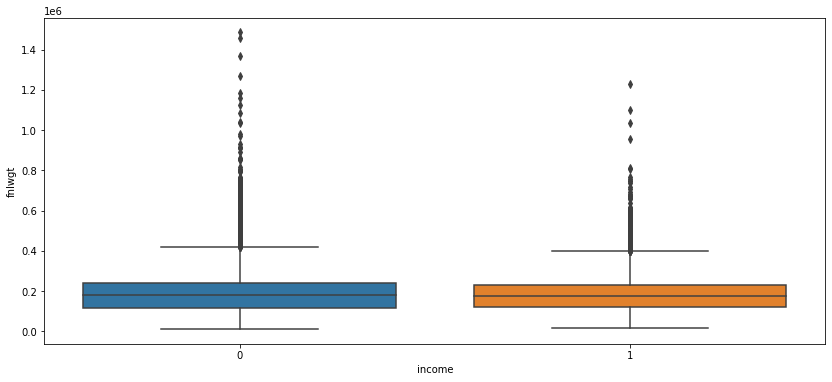

In [167]:
plt.figure(figsize=(14,6))
sns.boxplot(x='income',y='fnlwgt',data=train_data)

### Analysis
- There are more outliers present in group 0 than group 1

# Bivariate Analysis for categorical columns

In [168]:
## categorical columns

cat_col

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

## Income and workclass

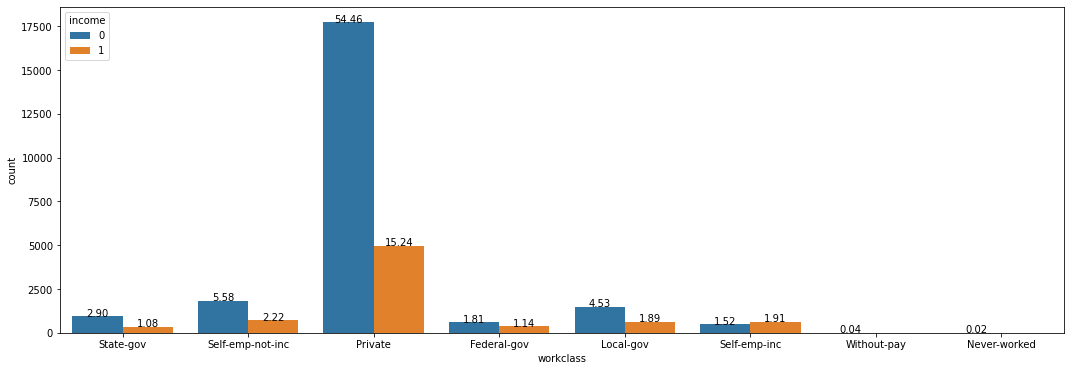

In [169]:
plt.figure(figsize=(18,6))

total=float(len(train_data['income']))
ax=sns.countplot(x='workclass',hue='income',data=train_data)

for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,height+10,
          '{:1.2f}'.format(100*height/total),
          ha='center')


### Analysis

- Self-emp-inc is only the catgory where number of people who earn more than 50K is more than the number of people who earns less than or equla to 50K
- Otherwise number of people who earns less than or equal than 50K is more than the number of people who earn smore than 50K

### Income and education

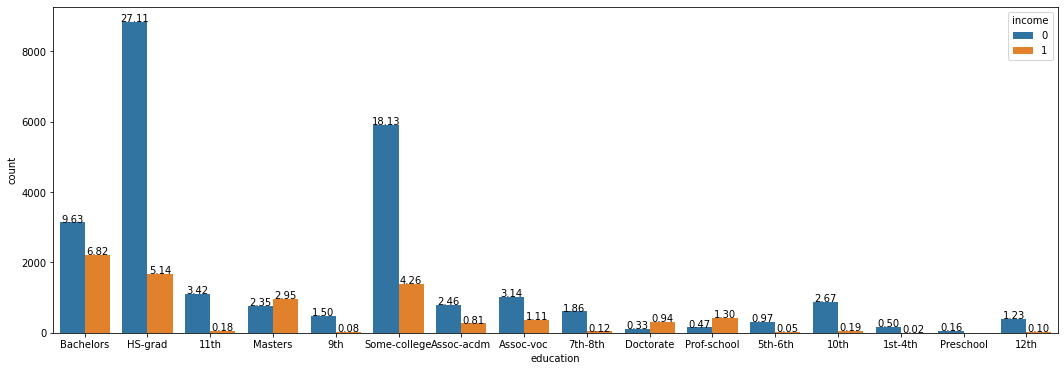

In [170]:
plt.figure(figsize=(18,6))

total=float(len(train_data['income']))
ax=sns.countplot(x='education',hue='income',data=train_data)

for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,height+10,
          '{:1.2f}'.format(100*height/total),
          ha='center')


### Analysis
- Masters, Doctrate and Prof-school are the category where number of people who earn more than 50K is more than the people who earn less than or equal to 50K
- Otherwise number of people who earns less than or equal than 50K is more than the number of people who earn smore than 50K

### Income, marital- status


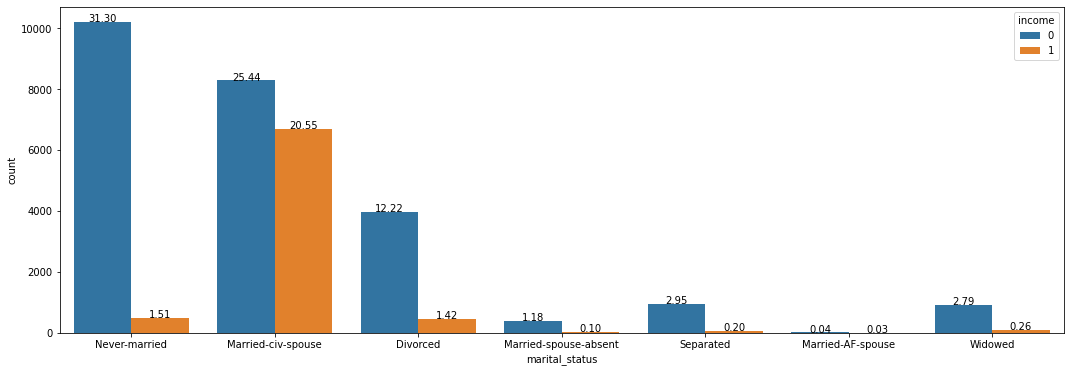

In [171]:
plt.figure(figsize=(18,6))

total=float(len(train_data['income']))
ax=sns.countplot(x='marital_status',hue='income',data=train_data)

for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,height+10,
          '{:1.2f}'.format(100*height/total),
          ha='center')

### Analysis
- Here there is no category where counting of person whos earns more 50K is more than persons who earns less than or equal to 50K
-  The number of people who earn less than 50K is maximum in Never-married category and is minimum in Maried-AF-spouce.

- The number of people who earn more than 50K is maximum in Married-spouce category and is minimum in Maried-AF-spouce.

### Income and Occupation

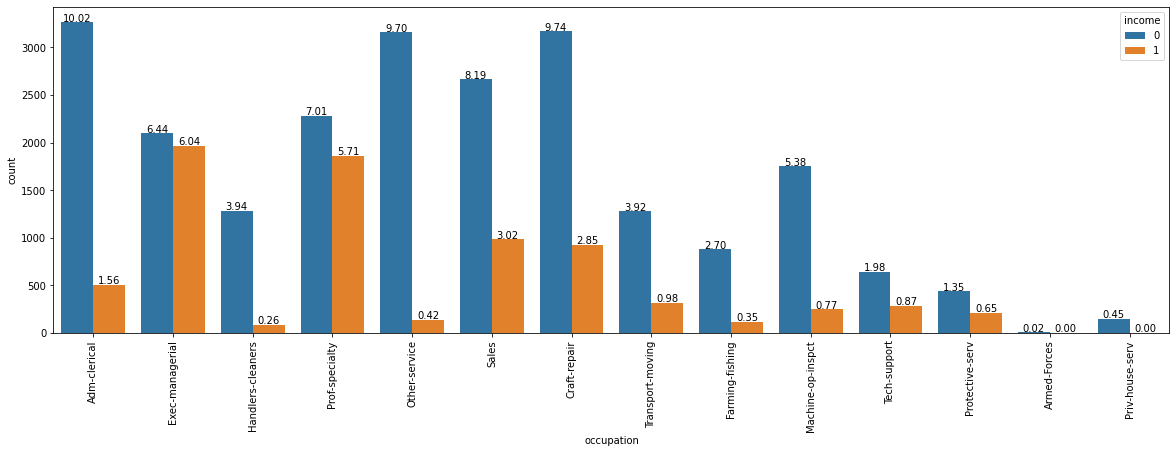

In [172]:
plt.figure(figsize=(20,6))

total=float(len(train_data['income']))
ax=sns.countplot(x='occupation',hue='income',data=train_data)
plt.xticks(rotation=90)

for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,height+10,
          '{:1.2f}'.format(100*height/total),
          ha='center')

### Analysis
- Here there is no category where counting of person whos earns more than  50K is higher than the people who earns less than or equal to 50K
-  The number of people who earn less than 50K is maximum in Adm-clerical category.

- The number of people who earn more than 50K is maximum in Exec-managerial category .
- Armed-Force and Priv-house-serv are the category where people dont earn more than 50K

### Income and relationship

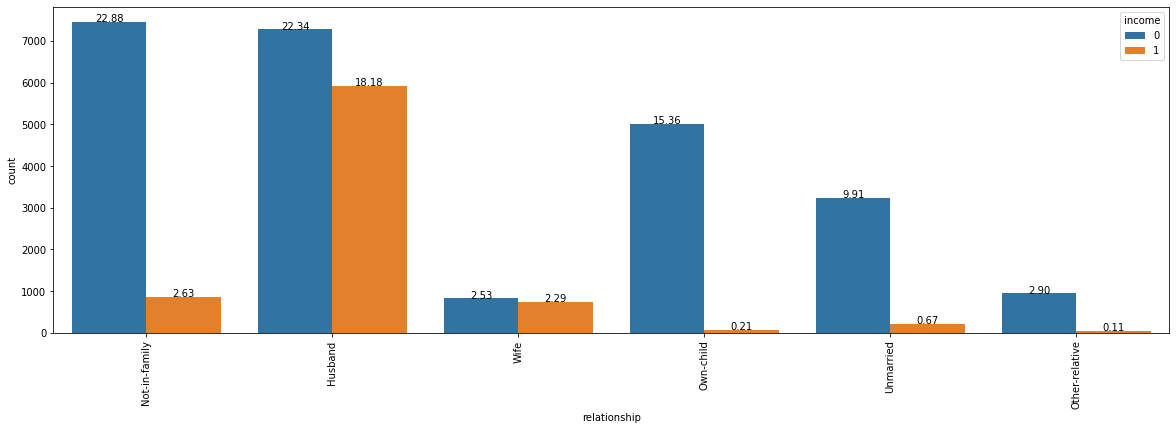

In [173]:
plt.figure(figsize=(20,6))

total=float(len(train_data['income']))
ax=sns.countplot(x='relationship',hue='income',data=train_data)
plt.xticks(rotation=90)

for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,height+10,
          '{:1.2f}'.format(100*height/total),
          ha='center')

### Income and race


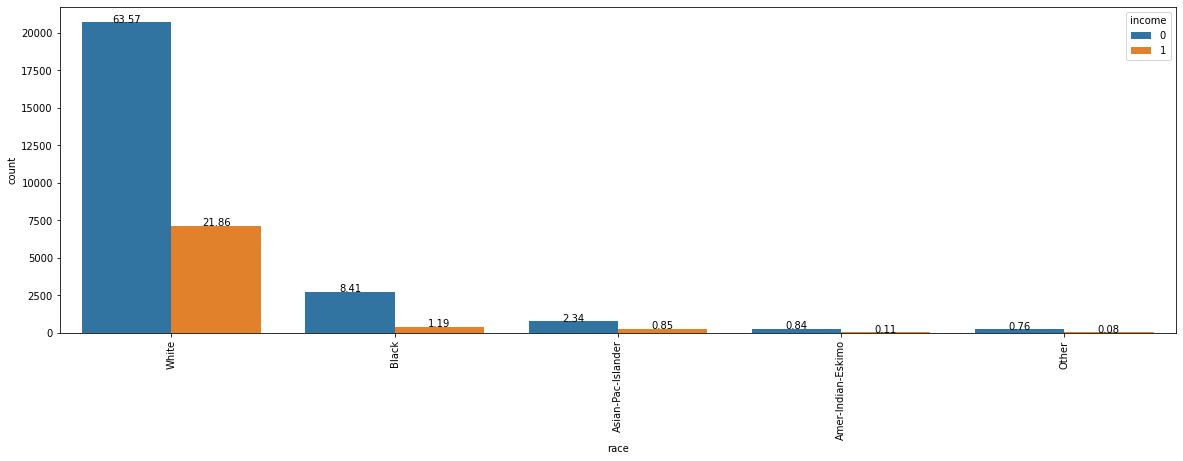

In [174]:
plt.figure(figsize=(20,6))

total=float(len(train_data['income']))
ax=sns.countplot(x='race',hue='income',data=train_data)
plt.xticks(rotation=90)

for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,height+10,
          '{:1.2f}'.format(100*height/total),
          ha='center')

## Income and sex

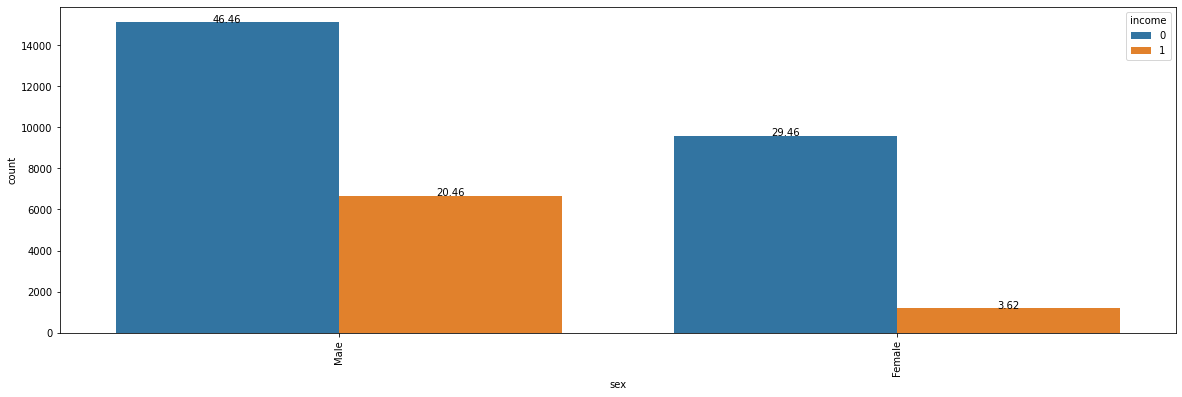

In [175]:
plt.figure(figsize=(20,6))

total=float(len(train_data['income']))
ax=sns.countplot(x='sex',hue='income',data=train_data)
plt.xticks(rotation=90)

for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,height+10,
          '{:1.2f}'.format(100*height/total),
          ha='center')

### Analysis
- Percentage of people who earns more than 50K is higher for Male category

## Multivariate analysis
- Income, age, sex

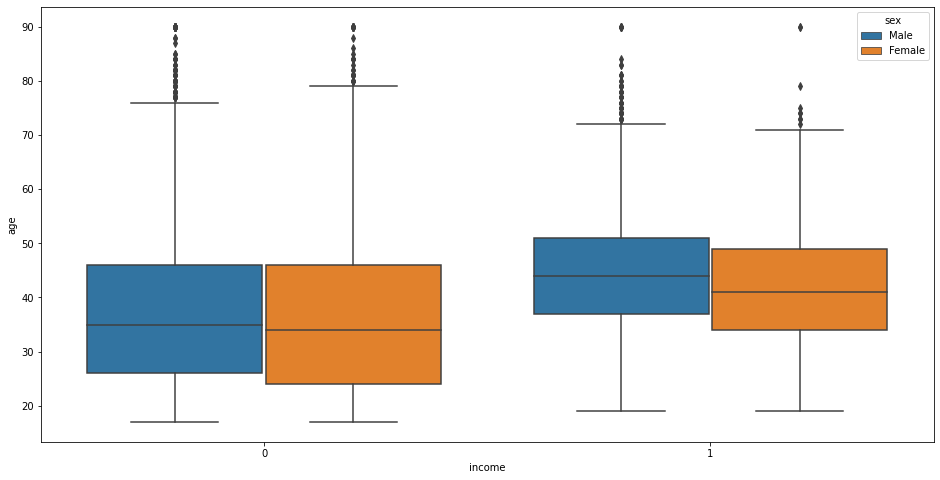

In [176]:
plt.figure(figsize=(16,8))
sns.boxplot(x='income',y='age',hue='sex',data=train_data)

## Analysis
- The median age of Female and Male for the gorup wher income is <= 50K is approximately wqual
- The meadian age of Male is higher than than taht of Female for the group where income >50K
- Some outliers are present in  each group 

## Correlation
- To check correlation we plot heatmap

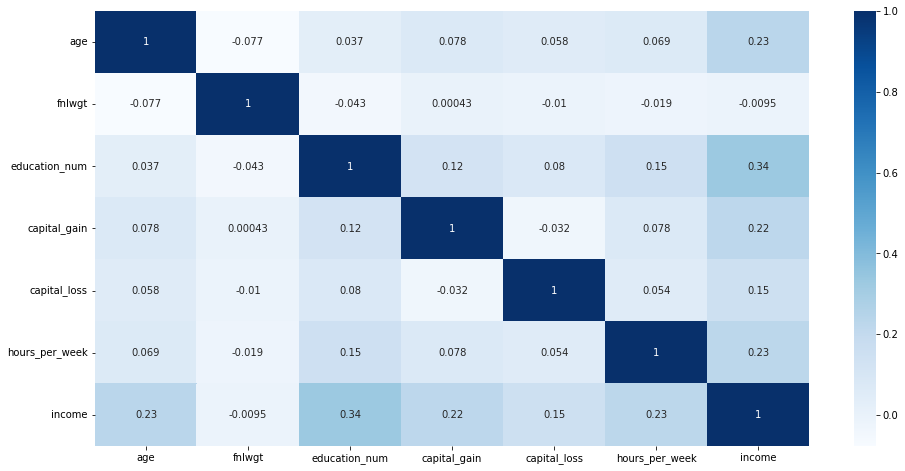

In [177]:
plt.figure(figsize=(16,8))
sns.heatmap(train_data.corr(),annot=True,cmap='Blues')

- We can see there is no high multicollinearity in data set

## Creating Capital_change column
-  We are creating capital change  column from capital_loss and capital_gain columns

In [178]:
capital_change=train_data['capital_gain']-train_data['capital_loss']

# inserting capital_change at 2nd last position
position=train_data.shape[1]-1
train_data.insert(position,'capital_change',capital_change)

# droping the capital_gain and capital_loss columns
train_data=train_data.drop(['capital_gain','capital_loss'],axis=1)

In [179]:
train_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,capital_change,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,2174,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,0


# Feature selection

### **Hypothesis testing**
- **Two sample t-test**: In two sample t- test we take mean of two indipendent groups and compare them to find out whether there is any association or not.
- We do some hypothesis to find out the  association between two columns
- **Null Hypothesis**: H0: μ1 = μ2
-     :--There is no difference between the mean of both of the group
- **Alternative Hyptothesis** : H1: mean1 != mean2  
-  :--- There is difference between the mean of both of the group
- We will calculate t0 (t-test value) and compare it with te (expected value)

- If t0 < te :-- We accept the null hypothesis
- If t0 > te :-- We reject the null hypothesis
- *OR*
-If p_value >0.05 :---- We accept the null hypothesis
- If p_value < 0.05 :--- We reject the null hypothesis



# Example

#### Hypothesis for age and income 
- μ1 is the mean of age for income group <=50K
- μ2  is the mean of age for income group > 50K
- H0 : μ1 = μ2 
- :--- There is no differece between the mean of age for income group <=50K and income group > 50K

- H1 :  μ1 ≠ μ2
:----  There is a differece between the mean of age for income group <=50K and income group > 50K

In [180]:
# creating the list of numerical columns
num_cols=[col for col in train_data.columns if train_data[col].dtype!='O']
num_cols

['age',
 'fnlwgt',
 'education_num',
 'hours_per_week',
 'capital_change',
 'income']

In [181]:
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats
import random

random.seed(21)
hypothesis=[]
p_values=[]
for col in num_cols[:-1]:
  data=train_data[np.abs(stats.zscore(train_data[col])<3)]
  income_0=data[data['income']==0][col]
  income_1=data[data['income']==1][col]

  # converting into list and taking sample
  income_0=income_0.values.tolist()
  income_0=random.sample(income_0,100)
  
  # converting into list and taking sample
  income_1=income_1.values.tolist()
  income_1=random.sample(income_1,100)

  # calling ttest function that give t_test and P_value
  ttest,pval=ttest_ind(income_0,income_1,equal_var=False)
  
  # appending the p_value into p_values emptylist
  p_values.append(np.round(pval,4))



  #print('t_test',ttest)
  #print('pval',pval)

  if pval<0.05:
     hypothesis.append('Reject the null hyptothesis')
  else:
     hypothesis.append('Accept the null hypothesis')


data_frame=pd.DataFrame(p_values,columns=['P_value'],index=num_cols[:-1])
data_frame['Hypothesis']=hypothesis

data_frame

,P_value,Hypothesis
age,0.0000,Reject the null hyptothesis
fnlwgt,0.8454,Accept the null hypothesis
education_num,0.0000,Reject the null hyptothesis
hours_per_week,0.0001,Reject the null hyptothesis
capital_change,0.0000,Reject the null hyptothesis


## conclusion of hypothesis
- We are accepting the null hypothesis only for fnlwgt columns
-  It means fnlwgt is the column that is not showing the relationship with target column
- There is some dependeny of traget columns on other columns excepting fnlwgt

In [182]:
# Droping the fnlwgt column

train_data=train_data.drop(['fnlwgt'],axis=1)

## Chi-Square-Test for categorical features selection



- **Chi-Square-Test** :--A chi-square test is used when you want to see if there is a relationship between two categorical variables
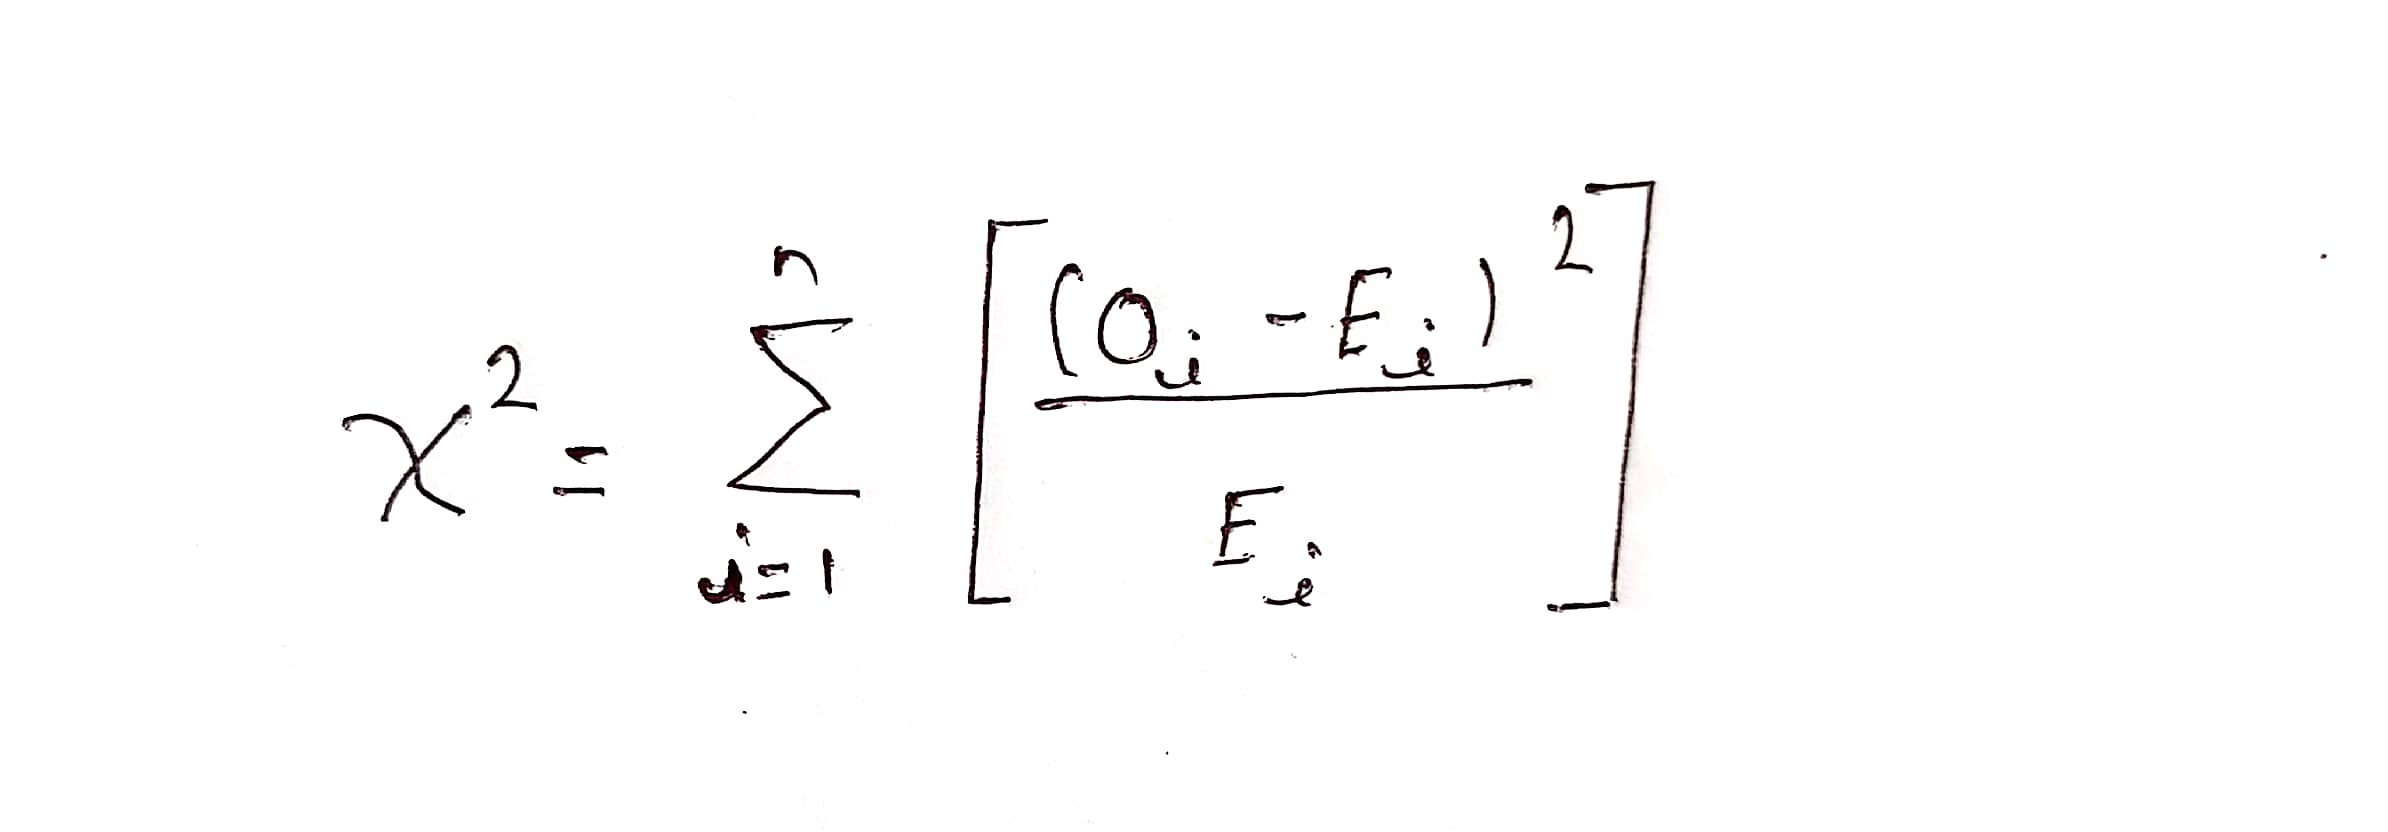


- Where:- 
- :--χ2 represent the Chi-Suqare_test, 
- :--O represent the observed frequency 
- :--E represent the expected frequency

- We create the contingency table , it is use to determine whether the one varible is dependent on other or not
- **Null Hypothesis**: H0: μ1 = μ2
-     :--There is no relationship  between  of both of the variable
- **Alternative Hyptothesis** : H1: mean1 != mean2 
-     :-- There is some realationship between both of the variable
- *if statistics >= critical value (expected value)*  :---we  reject the null hypothesis
- *if statistics< critical value*  :--- We accept the null hypothesis
- *or*
-If p_value >0.05 :---- We accept the null hypothesis
- If p_value < 0.05 :--- We reject the null hypothesis


In [183]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

p_value=[]
hypothesis=[]
stat=[]
for col in cat_col:
  sample_col=train_data[col].sample(frac=0.01,random_state=1)
  sample_income=train_data['income'].sample(frac=0.01,random_state=1)
  contingency_table=pd.crosstab(sample_col,sample_income,margins=True)
  stats,p_val,dof,expected= chi2_contingency(contingency_table)
  prob=0.95
  critical=chi2.ppf(prob,dof)
  stat.append(stats)
  p_value.append(p_val)
  if stats>=critical:
    hypothesis.append('Reject the null hypothesis')

  else:
    hypothesis.append('Accept the null hypothesis')


data_frame=pd.DataFrame(p_value,columns=['P_value'],index=cat_col)
data_frame['stats']=stat
data_frame['hypothesis']=hypothesis
data_frame

,P_value,stats,hypothesis
workclass,0.808534,7.694382,Accept the null hypothesis
education,0.006178,55.475047,Reject the null hypothesis
marital_status,0.000478,34.943606,Reject the null hypothesis
occupation,0.084105,36.426192,Accept the null hypothesis
relationship,0.000108,38.932958,Reject the null hypothesis
race,0.979380,3.083901,Accept the null hypothesis
sex,0.011448,12.965069,Reject the null hypothesis
native_country,0.995837,16.187987,Accept the null hypothesis


### Conclusion of hypothesis
- For the workclass, occupation, race, native_country columns we have accepted the null hypothesis
- It means these columns are not showing the relationship with target column
- But for education, marital_sattus, relatioship, sex columns we have rejected the null hypothesis
- It means these columns are showing that target columns has dependency on them

In [184]:
# droping workclass, occupation, race, native_country columns
# we are droping the education columns also because education_num also represent the same information

train_data=train_data.drop(['workclass','education', 'occupation', 'race', 'native_country'], axis=1)

In [185]:
## applying square root transformation
#for col in num_cols:
#  train_data[col]=np.sqrt(train_data[col])

# checking the skewness after transformation

#for col in num_cols:
#  print(f'Skewness for {col} is : ',train_data[col].skew())


# Creating the feature and target column

In [186]:
x=train_data.drop('income',axis=1)
y=train_data['income']

# Encoding the categorical columns

In [187]:
cat_cols=[col for col in x.columns if x[col].dtype=='O']
cat_cols

['marital_status', 'relationship', 'sex']

In [188]:
# converting sex columns to 0 and 1 
x['sex']=x['sex'].map({'Female': 0,'Male': 1})

# converting the datatype of sex column into integer
x['sex']=x['sex'].astype(int)

# cerating single and married class in marital_status 
x['marital_status']=x['marital_status'].replace(['Never-married','Separated','Widowed','Divorced'],'single')
x['marital_status']=x['marital_status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],'married')

# converting single and married into 0 and 1 respectively
x['marital_status']=x['marital_status'].map({"single":0,"married":1})

# changig the datatype of marital_status column into integer

x['marital_status']=x['marital_status'].astype(int)


In [189]:
# applying get_dummies for encoding

relationship=pd.get_dummies(x['relationship'])

# concatinating the dataframes
x=pd.concat([x,relationship],axis=1)

# droping the relationship column

x=x.drop('relationship',axis=1)

In [190]:
# printing the new created data frame

x.head()

,age,education_num,marital_status,sex,hours_per_week,capital_change,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,39,13,0,1,40,2174,0,1,0,0,0,0
1,50,13,1,1,13,0,1,0,0,0,0,0
2,38,9,0,1,40,0,0,1,0,0,0,0
3,53,7,1,1,40,0,1,0,0,0,0,0
4,28,13,1,0,40,0,0,0,0,0,0,1


# Spliting the data

In [191]:
# split the data set into training and validation set

x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.20,random_state=21)

# Feature scaling
- We apply feature scaling to scale the data into same range
- We will apply standard scaler

In [192]:
# scaling

# creating instance for standard scaler class
scaler=StandardScaler()

# transforming the data
x_train_scaled=scaler.fit_transform(x_train)
x_val_scaled=scaler.transform(x_val)

In [193]:
x_train_scaled.shape, x_val_scaled.shape

((26048, 12), (6513, 12))

# Model Building

In [194]:
# Import the libraries


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, precision_score, accuracy_score,recall_score,roc_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score


cv_score of Log_reg is 0.8067419264384063

calssification report of Log_reg is 
               precision    recall  f1-score   support

           0       0.85      0.92      0.89      4926
           1       0.67      0.51      0.58      1587

    accuracy                           0.82      6513
   macro avg       0.76      0.72      0.73      6513
weighted avg       0.81      0.82      0.81      6513

cv_score of decision_tree is 0.8256678662981425

calssification report of decision_tree is 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      4926
           1       0.67      0.58      0.62      1587

    accuracy                           0.83      6513
   macro avg       0.77      0.74      0.76      6513
weighted avg       0.82      0.83      0.82      6513

cv_score of random_forest is 0.8417918787393294

calssification report of random_forest is 
               precision    recall  f1-score   support

           0       0.88 

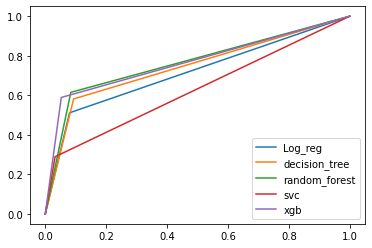

In [197]:
# create the dictionary of models

models={'Log_reg':LogisticRegression(),
       'decision_tree':DecisionTreeClassifier(),
       'random_forest':RandomForestClassifier(),
       'svc':SVC(),
       'xgb':XGBClassifier()}

#

kfold=KFold(n_splits=5)


for key, model in models.items():
  clf=model.fit(x_train,y_train)
  cv_score=cross_val_score(model,x_train,y_train,cv=5)
  y_pred=clf.predict(x_val)
  classification=classification_report(y_val,y_pred)
  fpr,tpr,_=roc_curve(y_val,y_pred)
  print(f'cv_score of {key} is', cv_score.mean())
  print(f'\ncalssification report of {key} is \n', classification)


  plt.plot(fpr,tpr,label=key)
  plt.legend()



## Analysis
- We can see in roc curve, the area under curve is maximum for XGB Classifier, which suggest it is best classifier here
- We can aslo see the calssification report for each model, It also suggesting that XGB Classifier is giving us best result among all algorithm that we have used
- XGB Classifier is giving us 85.8% of accuracy

## Final Model

In [198]:
## Selecting the final model
## We are taking number of tree equal to 100 and maximum depth equal to 8

xgb=XGBClassifier(max_depth=8,n_estimators=100,verbosity=1)

xgb.fit(x_train,y_train)






XGBClassifier(max_depth=8)

## Save the model

In [206]:
# saving the model in pickle format

filename='census_income.pickle'

saved_model=pickle.dump(xgb,open(filename,'wb'))

## Prediction

In [199]:
y_pred=xgb.predict(x_val)
y_pred



array([0, 0, 1, ..., 0, 1, 0])

# Performance of model

In [200]:
print('Classification Report\n', classification_report(y_val,y_pred))

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.94      0.91      4926
           1       0.78      0.63      0.69      1587

    accuracy                           0.86      6513
   macro avg       0.83      0.78      0.80      6513
weighted avg       0.86      0.86      0.86      6513



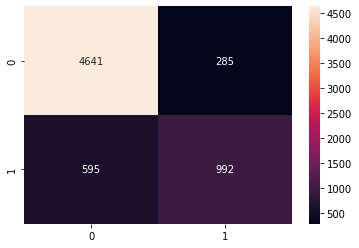

In [201]:
# confusion_matrix

sns.heatmap(confusion_matrix(y_val,y_pred), annot=True,fmt='g')

# Conclusion
- In this problem statement our main aim was to predict the income of person based on the given features by using different-2 classification algorithm whether perosn earns <=50K or >50K
- First of all we have loaded the data set.We did some data preprocessing to clean the data set
- After doing the cleaning we have done some Exploratory data analysis to analyse the data set and to make out some insight from data set
- We have also ploted some graphs to visualize the data set.
- We have done some feature selection based on hypothesis testing
- Feature sclaing was also done
- In the last we have trained some algorithm on training data set
- To check the performace of models we have created classification report and ploted ROC curve.
- On the basis of classification report and ROC curve we have done some comparision where we find XGB Classifier was giving us the best result with accuracy of 86%